<a href="https://colab.research.google.com/github/godly-raam/Quantum_TSP_Project/blob/main/Quantum_TSP_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Final Installation: Pinning all packages to known compatible versions.
# Add streamlit-folium to your installations
!pip install streamlit streamlit-folium pyngrok qiskit qiskit-aer qiskit-algorithms qiskit_optimization networkx matplotlib

In [13]:
!pip install qiskit==1.1.0 qiskit-aer==0.14.2 qiskit-algorithms==0.3.0 qiskit-optimization==0.7.0

In [14]:
import qiskit
import qiskit_aer
import qiskit_algorithms
import qiskit_optimization

print(f"Qiskit version: {qiskit.__version__}")
print(f"Qiskit Aer version: {qiskit_aer.__version__}")
print(f"Qiskit Algorithms version: {qiskit_algorithms.__version__}")
print(f"Qiskit Optimization version: {qiskit_optimization.__version__}")

Qiskit version: 1.1.0
Qiskit Aer version: 0.14.2
Qiskit Algorithms version: 0.3.0
Qiskit Optimization version: 0.7.0


In [15]:
# Cell 2: Connect to Google Drive and set up the project path
from google.colab import drive
import sys

drive.mount('/content/drive')

# Define the path to your project folder
project_path = '/content/drive/My Drive/Quantum_TSP_Project/'
# Add the 'modules' folder to Python's path
sys.path.append(project_path + 'modules/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Cell 3: Import everything you need
import numpy as np
import classical_solver
import quantum_solver
import plotter

In [17]:
# Cell 4: Define the Problem and Ask for Input
n = 4  # Number of cities
seed = 123  # For reproducibility

# --- THIS IS THE NEW PART ---
# Ask the user for the number of vehicles
num_vehicles_input = input("Enter the number of vehicles to use (e.g., 2): ")
num_vehicles = int(num_vehicles_input) # Convert the input text to an integer
# ---------------------------

# Generate city coordinates and the distance matrix
np.random.seed(seed)
coords = np.random.randint(0, 100, size=(n, 2))
distance_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(i + 1, n):
        dist = np.linalg.norm(coords[i] - coords[j])
        distance_matrix[i, j] = distance_matrix[j, i] = dist

print(f"\n--- Problem Definition ---")
print(f"{n} cities will be routed for {num_vehicles} vehicles.")

Enter the number of vehicles to use (e.g., 2): 2

--- Problem Definition ---
4 cities will be routed for 2 vehicles.


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Cell 5: Execute the classical and quantum solvers
classical_route, classical_distance = classical_solver.solve_classical_tsp(distance_matrix)
quantum_route, quantum_distance = quantum_solver.solve_quantum_vrp(distance_matrix, num_vehicles=num_vehicles)

--- Classical Solution ---
Route: [0, 2, 1, 3, 0]
Distance: 183.14

--- Quantum VRP Solution ---
Optimized routes for 2 vehicles (QAOA reps=5):
  Vehicle 1: [] | Distance: 0.00
  Vehicle 2: [] | Distance: 0.00


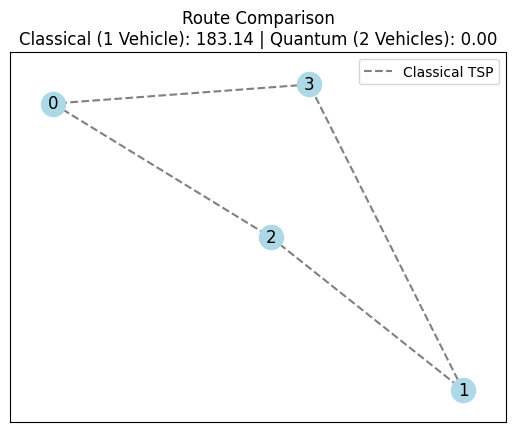


Plot saved to: /content/drive/My Drive/Quantum_TSP_Project/results/route_comparison.png


<Figure size 640x480 with 0 Axes>

In [20]:
# Cell 6: Plot the results and save the figure
final_plot = plotter.plot_results(coords, classical_route, classical_distance, quantum_route, quantum_distance)

# Optionally, save the figure to your results folder
figure_path = project_path + 'results/route_comparison.png'
final_plot.savefig(figure_path)
print(f"\nPlot saved to: {figure_path}")

In [21]:
# Install Streamlit and pyngrok (a tool to expose web apps from Colab)
!pip install streamlit pyngrok

In [22]:
from pyngrok import ngrok, conf
import os

# --- THIS IS THE NEW PART ---
# Paste your authtoken here. It's like a password for ngrok.
authtoken = "31jyh8Mg8Ekv1xFgCqgsVRpwbRc_2ETi4k9wFrA45GSrUSmmZ"
conf.get_default().auth_token = authtoken
# ---------------------------

# Terminate any existing ngrok tunnels
ngrok.kill()

# Set up the public URL
public_url = ngrok.connect(8501)
print(f"Click to view your Streamlit app: {public_url}")

# Run the streamlit app in the background
os.system("streamlit run /content/drive/MyDrive/Quantum_TSP_Project/app.py")

Click to view your Streamlit app: NgrokTunnel: "https://2252c540f78b.ngrok-free.app" -> "http://localhost:8501"


2